In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

In [4]:
dir_current = Path.cwd() 
dir_data = dir_current / "SalesAnalysis" / "Sales_Data"
dir_data


WindowsPath('c:/Users/azejja/OneDrive - Alstom/Bureau/Learn_/requests/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data')

In [5]:
df = pd.read_csv(dir_data / "Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [20]:
df.shape

(18383, 7)

In [94]:
total_df=pd.DataFrame()
for file in dir_data.glob("*.csv"):
    df = pd.read_csv(file)
    df["Month"] = file.name.split('_')[1]
    total_df = pd.concat([total_df, df])
    print(total_df.shape)
total_df.describe()

(18383, 7)
(30394, 7)
(55511, 7)
(67547, 7)
(77270, 7)
(91641, 7)
(105263, 7)
(120489, 7)
(137124, 7)
(154785, 7)
(175164, 7)
(186850, 7)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
count,186305,186305,186305,186305,186305,186305,186850
unique,178438,20,10,24,142396,140788,12
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address,December
freq,355,21903,168552,21903,355,355,25117


In [95]:
total_df.dropna(inplace=True)
total_df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [96]:
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April


In [97]:
drop_index = total_df.loc[total_df["Quantity Ordered"].str.contains("Q")].index
print(total_df.shape)
total_df.drop(index=drop_index, inplace= True)
print(total_df.shape)

(186305, 7)
(182735, 7)


In [98]:
total_df["Quantity Ordered"].astype("float")

0        2.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
11681    3.0
11682    1.0
11683    1.0
11684    1.0
11685    1.0
Name: Quantity Ordered, Length: 182735, dtype: float64

In [108]:
total_df ["Sale value"] = total_df.loc[:,"Quantity Ordered"].astype("float64") * total_df.loc[:,"Price Each"].astype("float64")
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale value,m
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,04


In [100]:
total_df.groupby("Month")["Sale value"].sum().sort_values(ascending = True)

Month
January      1.779590e+06
September    2.051618e+06
February     2.159586e+06
August       2.191743e+06
June         2.524944e+06
July         2.586481e+06
March        2.757928e+06
May          3.093859e+06
November     3.149091e+06
April        3.341769e+06
October      3.679411e+06
December     4.563759e+06
Name: Sale value, dtype: float64

In [101]:
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale value
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99


In [111]:
i=50000
print(total_df.iloc[i]["Order Date"])
print(total_df.iloc[i]["Order Date"].split("/")[0])

12/05/19 13:14
12


In [122]:
total_df["m"] = [x.split("/")[0] for x in total_df["Order Date"]]
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale value,m
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,04


In [123]:
total_df["m"].unique()


array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

<AxesSubplot:xlabel='m'>

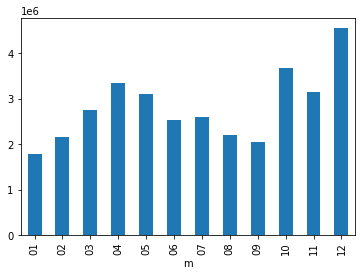

In [126]:
total_df.groupby("m")["Sale value"].sum().plot(kind="bar")

## Question 2 : city with the most sales

In [143]:
total_df["City"] = [x.split(",")[1] + " " + x.split(",")[2].split(" ")[1] for x in total_df["Purchase Address"]]
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale value,m,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,04,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,04,Boston MA
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,04,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,04,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,04,Los Angeles CA


<AxesSubplot:xlabel='City'>

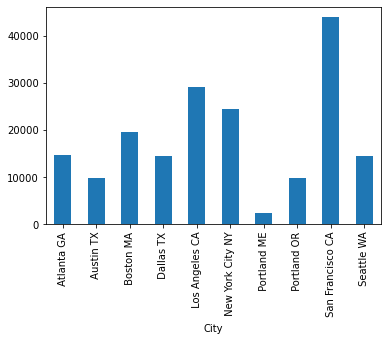

In [144]:
total_df.groupby("City")["Sale value"].count().plot(kind = "bar")

<AxesSubplot:xlabel='City'>

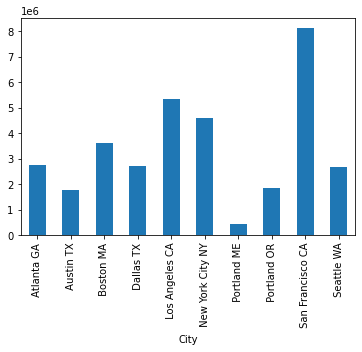

In [145]:
total_df.groupby("City")["Sale value"].sum().plot(kind = "bar")

## Question 3 : when's the best time in the day to display ads

In [146]:
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale value,m,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,04,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,04,Boston MA
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,04,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,04,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,04,Los Angeles CA


In [149]:
total_df["Hour"] = total_df["Order Date"].astype("datetime64[h]").dt.hour
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale value,m,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,04,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,04,Boston MA,22
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,04,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,04,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,04,Los Angeles CA,9


<AxesSubplot:xlabel='Hour'>

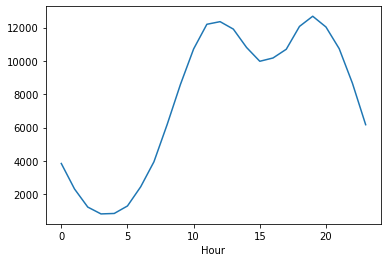

In [151]:
total_df.groupby("Hour")["Sale value"].count().plot(kind="line")

## Question 4  : What products are often sold together

In [190]:
new_df = total_df[total_df["Order ID"].duplicated(keep = False)]
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale value,m,City,Hour
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,04,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,04,Los Angeles CA,14
18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",April,600.00,04,Los Angeles CA,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",April,11.95,04,Los Angeles CA,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",April,99.99,04,Boston MA,11


In [210]:
new_df.loc[:,"Grouped"] = new_df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
new_df = new_df [["Order ID","Grouped"]].drop_duplicates() 
new_df.head()

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [211]:
# Method 1
new_df.groupby("Grouped")["Grouped"].count().sort_values(ascending=False)

Grouped
iPhone,Lightning Charging Cable                                        860
Google Phone,USB-C Charging Cable                                      828
iPhone,Wired Headphones                                                355
Vareebadd Phone,USB-C Charging Cable                                   301
Google Phone,Wired Headphones                                          295
                                                                      ... 
Google Phone,USB-C Charging Cable,Wired Headphones,Wired Headphones      1
Vareebadd Phone,Lightning Charging Cable                                 1
Google Phone,USB-C Charging Cable,Wired Headphones,iPhone                1
Google Phone,Wired Headphones,AA Batteries (4-pack)                      1
iPhone,iPhone                                                            1
Name: Grouped, Length: 361, dtype: int64

In [218]:
# Method 2
from itertools import combinations
from collections import Counter
count = Counter()

for row in new_df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 973
('Google Phone', 'USB-C Charging Cable') 954
('iPhone', 'Wired Headphones') 437
('Google Phone', 'Wired Headphones') 401
('Vareebadd Phone', 'USB-C Charging Cable') 348
('iPhone', 'Apple Airpods Headphones') 343
('Google Phone', 'Bose SoundSport Headphones') 219
('USB-C Charging Cable', 'Wired Headphones') 156
('Vareebadd Phone', 'Wired Headphones') 141
('Lightning Charging Cable', 'Wired Headphones') 92


In [220]:
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale value,m,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",April,23.90,04,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",April,99.99,04,Boston MA,22
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,600.00,04,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",April,11.99,04,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",April,11.99,04,Los Angeles CA,9


In [229]:
total_df["Price Each"] = total_df["Price Each"].astype("float")

<AxesSubplot:xlabel='Product'>

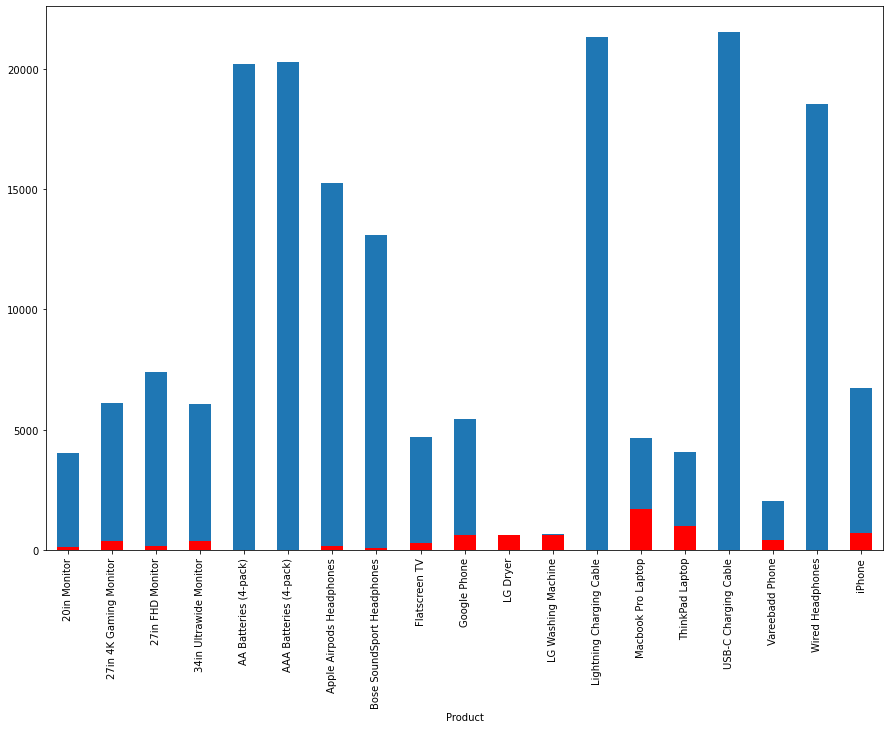

In [243]:
total_df.groupby("Product")["Quantity Ordered"].count().plot(kind="bar",figsize=(15,10))
total_df.groupby("Product")["Price Each"].mean().plot(kind="bar",color="r")
